# Explore here

In [64]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import os
import pandas as pd
from dotenv import load_dotenv


# load the .env file variables
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
load_dotenv()

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spy = spotipy.Spotify(client_credentials_manager=auth_manager)



In [65]:


# Introduce the chosen artist artist ID:
artist_id = "1yk1KXKWdvXVUC1TLAnO97"

def find_top_track(artist_id):
    top_tracks = []
    best_tracks = spy.artist_top_tracks(artist_id)
    for tracks in best_tracks['tracks']:
        top_tracks.append({
        'Duration_ms': round(tracks['duration_ms'] / 60000, 2),
        'Name': tracks['name'],
        'Popularity': tracks['popularity'] })
    return top_tracks

find_top_track(artist_id)

[{'Duration_ms': 2.54, 'Name': 'Matar la Pena', 'Popularity': 60},
 {'Duration_ms': 2.69, 'Name': 'Cuerda Auxiliar', 'Popularity': 51},
 {'Duration_ms': 3.11, 'Name': 'lo que haga falta', 'Popularity': 50},
 {'Duration_ms': 3.08, 'Name': 'Instante', 'Popularity': 42},
 {'Duration_ms': 2.51, 'Name': 'Honey', 'Popularity': 41},
 {'Duration_ms': 2.96, 'Name': 'El Cable', 'Popularity': 36},
 {'Duration_ms': 2.73, 'Name': 'Tu Carita', 'Popularity': 37},
 {'Duration_ms': 2.53, 'Name': 'Gas', 'Popularity': 32},
 {'Duration_ms': 2.89, 'Name': 'Las Cosas Normales', 'Popularity': 37},
 {'Duration_ms': 2.42, 'Name': 'Tu Buen Chaval', 'Popularity': 37}]

In [66]:
df = pd.DataFrame(find_top_track(artist_id))
df

,Duration_ms,Name,Popularity
0,2.54,Matar la Pena,60
1,2.69,Cuerda Auxiliar,51
2,3.11,lo que haga falta,50
3,3.08,Instante,42
4,2.51,Honey,41
5,2.96,El Cable,36
6,2.73,Tu Carita,37
7,2.53,Gas,32
8,2.89,Las Cosas Normales,37
9,2.42,Tu Buen Chaval,37


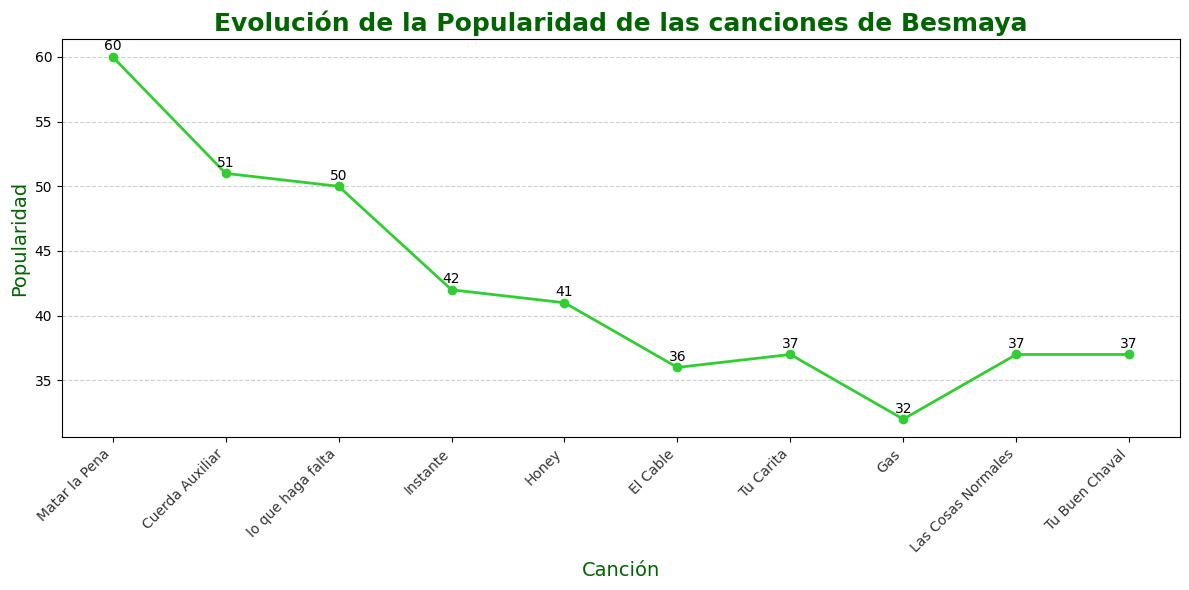

In [67]:
# Gráfico de líneas mejorado
plt.figure(figsize=(12, 6))
plt.plot(df['Name'], df['Popularity'], marker='o', color='#32CD32', linewidth=2)

# Títulos y etiquetas
plt.title('Evolución de la Popularidad de las canciones de Besmaya', fontsize=18, fontweight='bold', color='#006400')
plt.xlabel('Canción', fontsize=14, color='#006400')
plt.ylabel('Popularidad', fontsize=14, color='#006400')

# Etiquetas de datos en los puntos
for i, txt in enumerate(df['Popularity']):
    plt.text(i, df['Popularity'][i] + 0.5, f'{txt}', ha='center', fontsize=10, color='black')

# Ajuste de etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=10, color='#333333')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


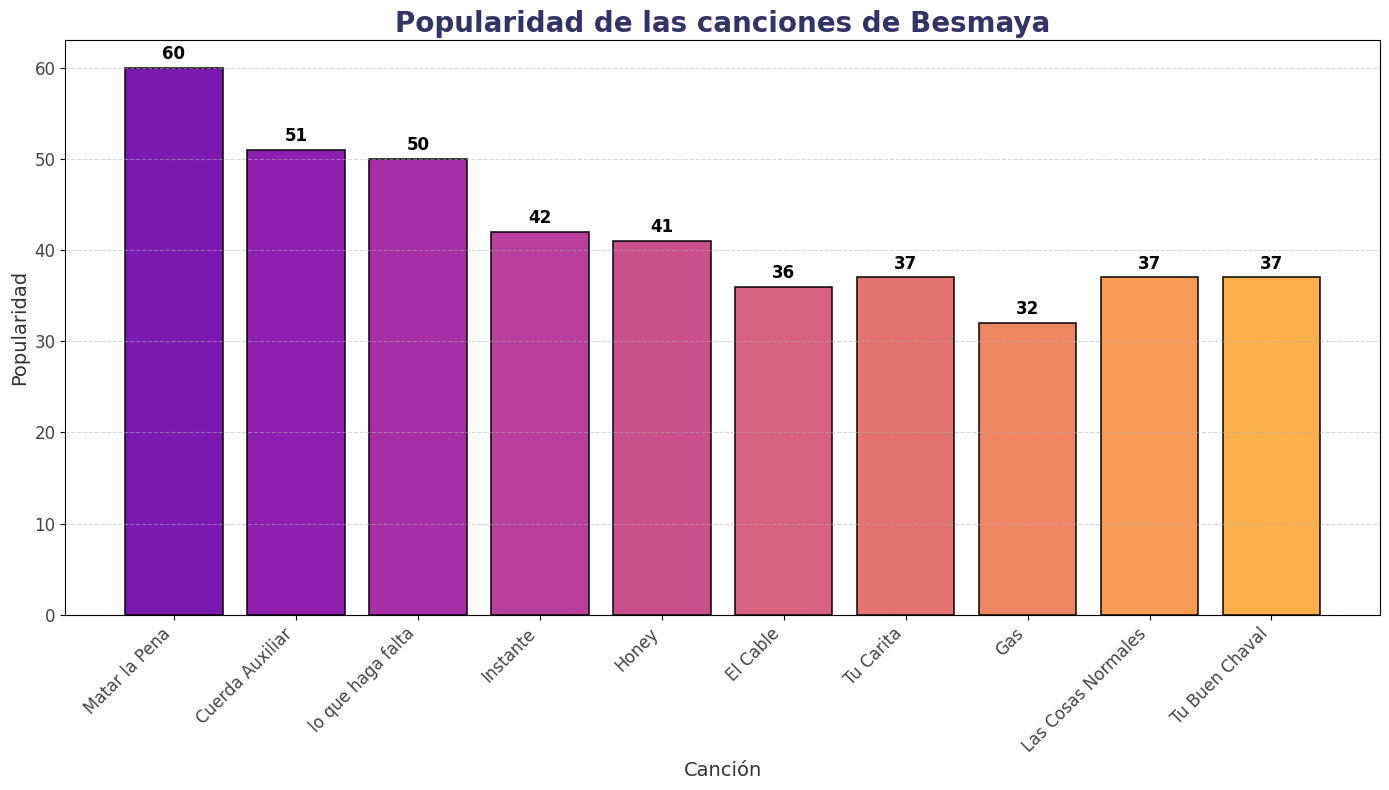

In [68]:

# Crear colores en gradiente
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(df['Name'])))

plt.figure(figsize=(14, 8))
bars = plt.bar(df['Name'], df['Popularity'], color=colors, edgecolor='black', linewidth=1.2, alpha=0.9)

# Agregar títulos estilizados
plt.title('Popularidad de las canciones de Besmaya', fontsize=20, fontweight='bold', color='#333366')
plt.xlabel('Canción', fontsize=14, color='#333333')
plt.ylabel('Popularidad', fontsize=14, color='#333333')

# Etiquetas sobre las barras
for bar, color in zip(bars, colors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Ajustar etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12, color='#444444')
plt.yticks(fontsize=12, color='#444444')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Ajuste de diseño
plt.tight_layout()
plt.show()


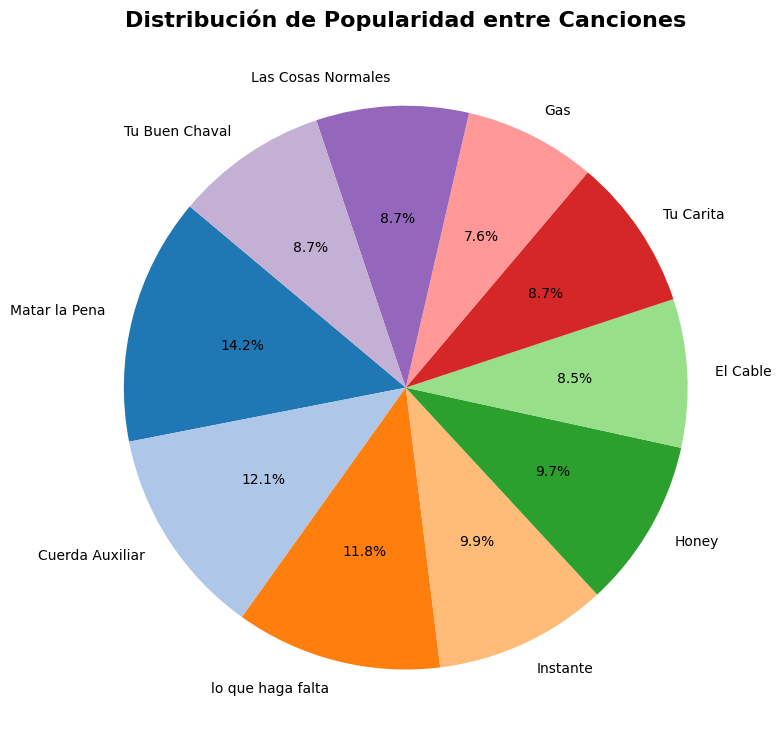

In [ ]:
# Gráfico de tarta para distribución de popularidad en quesito <3
plt.figure(figsize=(8, 8))
plt.pie(df['Popularity'], labels=df['Name'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribución de Popularidad entre Canciones', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


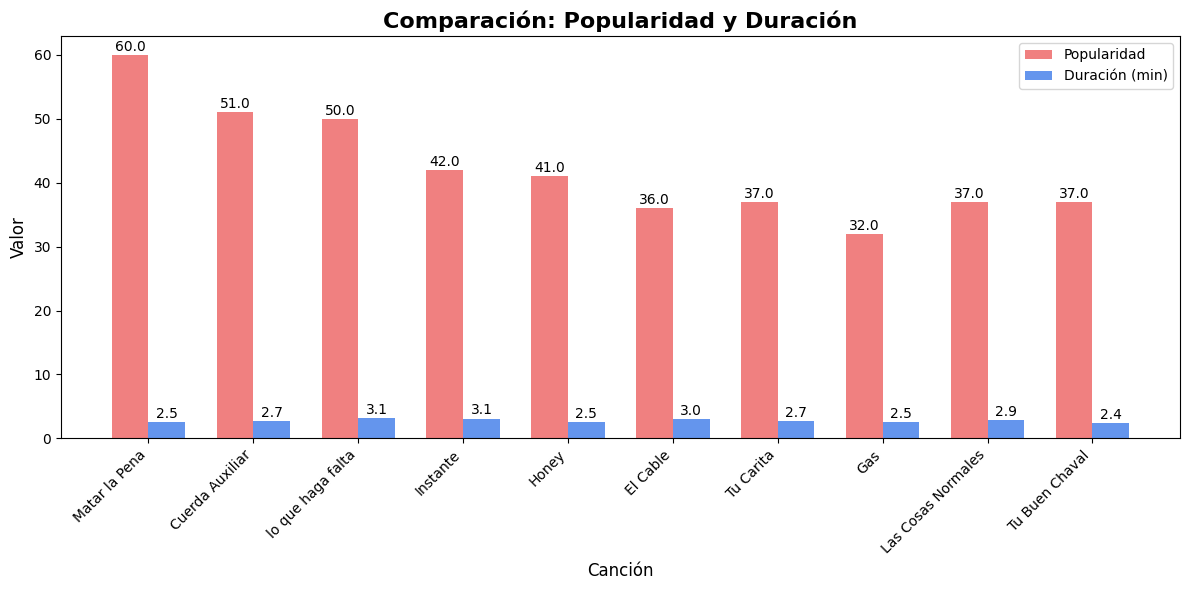

In [71]:
# Gráfico de barras apiladas para popularidad y duración
x = np.arange(len(df['Name']))  # Indices de las canciones
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width/2, df['Popularity'], width, label='Popularidad', color='lightcoral')
bar2 = ax.bar(x + width/2, df['Duration_ms'], width, label='Duración (min)', color='cornflowerblue')

# Añadir etiquetas y títulos
ax.set_title('Comparación: Popularidad y Duración', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df['Name'], rotation=45, ha='right')
ax.set_xlabel('Canción', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.legend()

# Etiquetas de valores sobre las barras
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
